# Assignment: K-Means Clustering on Credit Card Customer Data

## Objective
Train a K-Means clustering algorithm on the given dataset to segment credit card customers into different groups based on their spending behavior and demographic features.

## Instructions
1. **Download the Dataset**  
   Download the dataset from [this Kaggle link](https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data/data).

2. **Tasks**  

   ### a. Data Preprocessing
   - Load the dataset and inspect its structure.
   - Handle missing values, if any.
   - Scale the numerical features using an appropriate scaling technique.
   - Encode any categorical variables, if applicable.

   ### b. Exploratory Data Analysis (EDA)
   - Generate summary statistics for the dataset.
   - Visualize relationships or patterns in the data using scatter plots, pair plots, or histograms.

   ### c. K-Means Clustering
   - Use the **KMeans** algorithm from the `sklearn` library.
   - Train the model with the optimal number of clusters.

   ### d. Interpretation
   - Assign cluster labels to the dataset.
   - Visualize the clusters using two or more prominent features (e.g., using PCA for dimensionality reduction if necessary).
   - Analyze and describe the characteristics of each cluster (e.g., high spenders, low spenders, etc.).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [44]:
df = pd.read_csv('./Dataset/Credit Card Customer Data.csv')
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [46]:
df.drop(['Sl_No'], axis=1, inplace=True)

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [48]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [58]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_data)

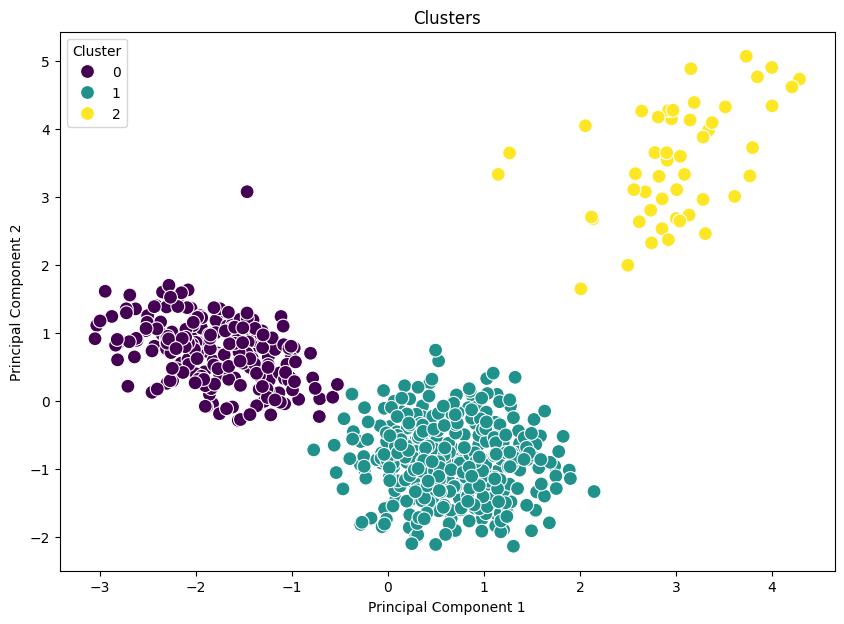

In [59]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
 
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]
 
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()